# BEGINNER LEVEL TASK 3 MUSIC RECOMMENDATION

# Author : Laiba Memon

# LGMVIP SEPTEMBER 2021

# IMPORTING LIBRARIES

In [39]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [5]:
train = pd.read_csv('train.csv')
test=pd.read_csv("test.csv")
members=pd.read_csv("members.csv")
songs=pd.read_csv("songs.csv")

In [6]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [7]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [8]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [9]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [10]:
# 1% sample of items
train = train.sample(frac=0.01)

In [11]:
train.shape

(73774, 6)

In [12]:
train = pd.merge(train, songs, on='song_id', how='left')

In [13]:
train.shape

(73774, 12)

In [14]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,Z/HRl18zbtddYbyitJge6dbXBKqbEZnVa3RI1bjQgZM=,CnDdAIpQIQJTEOselTg+e9yUg5nmPLfCa0Q19Il75NY=,my library,Album more,album,0,215745.0,465,蔡依林 (Jolin Tsai),NaN,NaN,3.0
1,EP5nIveAP+aNHx7mfO1qEo7S6TOrjx8gDs5X5qmX3DE=,6cgVn6qklbgL6YeRiR0tVgXLyLZ+Vj6+22w/PvTHHvc=,my library,Local playlist more,local-library,1,273763.0,1609,舞曲大閱兵,NaN,NaN,3.0
2,T4WRi4nG7RBxBayygHd+85Q8XyDOuGyd9vINvnmnezM=,6pe6XOKc+06NhkgrFitOb/EKMj910AlS34LdhP510LE=,my library,Local playlist more,local-library,1,176640.0,1609,MAJOR LAZER,C. Picard| F. Hall| I. Juber| M. Piccard| O. R...,NaN,-1.0
3,sgwOnr5odZA8MIG3b4P+vsGiz2UCfEKnRn6B5KV9Exs=,s8R72jJkyARQwgNK1DGj1C47L0ecGsB5q1eIDqVrOi0=,discover,Online playlist more,online-playlist,0,249312.0,458,田馥甄 (Hebe),林愷倫,藍小邪,3.0
4,leapP2N9rKvIuiRxPyJl9mxPY4GODgiXRTtYM1JxT5s=,HBVZJ/tLFrFg0AEKy1KgIRoBPu0xwVSxDbnVwwiJJUY=,my library,Local playlist more,local-library,1,246700.0,921,KCM,NaN,NaN,31.0


In [15]:
train = pd.merge(train, members, on='msno', how='left')
train.shape
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,Z/HRl18zbtddYbyitJge6dbXBKqbEZnVa3RI1bjQgZM=,CnDdAIpQIQJTEOselTg+e9yUg5nmPLfCa0Q19Il75NY=,my library,Album more,album,0,215745.0,465,蔡依林 (Jolin Tsai),NaN,NaN,3.0,4,29,female,3,20150110,20170920
1,EP5nIveAP+aNHx7mfO1qEo7S6TOrjx8gDs5X5qmX3DE=,6cgVn6qklbgL6YeRiR0tVgXLyLZ+Vj6+22w/PvTHHvc=,my library,Local playlist more,local-library,1,273763.0,1609,舞曲大閱兵,NaN,NaN,3.0,1,0,NaN,7,20120830,20170930
2,T4WRi4nG7RBxBayygHd+85Q8XyDOuGyd9vINvnmnezM=,6pe6XOKc+06NhkgrFitOb/EKMj910AlS34LdhP510LE=,my library,Local playlist more,local-library,1,176640.0,1609,MAJOR LAZER,C. Picard| F. Hall| I. Juber| M. Piccard| O. R...,NaN,-1.0,4,21,female,4,20160831,20171007
3,sgwOnr5odZA8MIG3b4P+vsGiz2UCfEKnRn6B5KV9Exs=,s8R72jJkyARQwgNK1DGj1C47L0ecGsB5q1eIDqVrOi0=,discover,Online playlist more,online-playlist,0,249312.0,458,田馥甄 (Hebe),林愷倫,藍小邪,3.0,13,34,male,9,20121031,20190405
4,leapP2N9rKvIuiRxPyJl9mxPY4GODgiXRTtYM1JxT5s=,HBVZJ/tLFrFg0AEKy1KgIRoBPu0xwVSxDbnVwwiJJUY=,my library,Local playlist more,local-library,1,246700.0,921,KCM,NaN,NaN,31.0,1,0,NaN,7,20130211,20170910


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    73774 non-null  object 
 1   song_id                 73774 non-null  object 
 2   source_system_tab       73551 non-null  object 
 3   source_screen_name      69549 non-null  object 
 4   source_type             73587 non-null  object 
 5   target                  73774 non-null  int64  
 6   song_length             73773 non-null  float64
 7   genre_ids               72573 non-null  object 
 8   artist_name             73773 non-null  object 
 9   composer                57113 non-null  object 
 10  lyricist                42110 non-null  object 
 11  language                73773 non-null  float64
 12  city                    73774 non-null  int64  
 13  bd                      73774 non-null  int64  
 14  gender                  44211 non-null

In [17]:
#Now I will count Null Values in %
train.isnull().sum()/train.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.302275
source_screen_name         5.726950
source_type                0.253477
target                     0.000000
song_length                0.001355
genre_ids                  1.627945
artist_name                0.001355
composer                  22.583837
lyricist                  42.920270
language                   0.001355
city                       0.000000
bd                         0.000000
gender                    40.072383
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [18]:
#Most of the Columns are Non Null but some Columns have Null Values, Now Remove Null Values from Columns
for i in train.select_dtypes(include=['object']).columns:
    train[i][train[i].isnull()] = 'unknown'
train = train.fillna(value=0)

In [19]:
#Now I will count Null Values in %
train.isnull().sum()/train.isnull().count()*100

msno                      0.0
song_id                   0.0
source_system_tab         0.0
source_screen_name        0.0
source_type               0.0
target                    0.0
song_length               0.0
genre_ids                 0.0
artist_name               0.0
composer                  0.0
lyricist                  0.0
language                  0.0
city                      0.0
bd                        0.0
gender                    0.0
registered_via            0.0
registration_init_time    0.0
expiration_date           0.0
dtype: float64

Now Changing Date and Time Format

In [20]:
# registration_init_time
train.registration_init_time = pd.to_datetime(train.registration_init_time, format='%Y%m%d', errors='ignore')
train['registration_init_time_year'] = train['registration_init_time'].dt.year
train['registration_init_time_month'] = train['registration_init_time'].dt.month
train['registration_init_time_day'] = train['registration_init_time'].dt.day

# expiration_date
train.expiration_date = pd.to_datetime(train.expiration_date,  format='%Y%m%d', errors='ignore')
train['expiration_date_year'] = train['expiration_date'].dt.year
train['expiration_date_month'] = train['expiration_date'].dt.month
train['expiration_date_day'] = train['expiration_date'].dt.day

In [21]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,Z/HRl18zbtddYbyitJge6dbXBKqbEZnVa3RI1bjQgZM=,CnDdAIpQIQJTEOselTg+e9yUg5nmPLfCa0Q19Il75NY=,my library,Album more,album,0,215745.0,465,蔡依林 (Jolin Tsai),unknown,...,female,3,2015-01-10,2017-09-20,2015,1,10,2017,9,20
1,EP5nIveAP+aNHx7mfO1qEo7S6TOrjx8gDs5X5qmX3DE=,6cgVn6qklbgL6YeRiR0tVgXLyLZ+Vj6+22w/PvTHHvc=,my library,Local playlist more,local-library,1,273763.0,1609,舞曲大閱兵,unknown,...,unknown,7,2012-08-30,2017-09-30,2012,8,30,2017,9,30
2,T4WRi4nG7RBxBayygHd+85Q8XyDOuGyd9vINvnmnezM=,6pe6XOKc+06NhkgrFitOb/EKMj910AlS34LdhP510LE=,my library,Local playlist more,local-library,1,176640.0,1609,MAJOR LAZER,C. Picard| F. Hall| I. Juber| M. Piccard| O. R...,...,female,4,2016-08-31,2017-10-07,2016,8,31,2017,10,7
3,sgwOnr5odZA8MIG3b4P+vsGiz2UCfEKnRn6B5KV9Exs=,s8R72jJkyARQwgNK1DGj1C47L0ecGsB5q1eIDqVrOi0=,discover,Online playlist more,online-playlist,0,249312.0,458,田馥甄 (Hebe),林愷倫,...,male,9,2012-10-31,2019-04-05,2012,10,31,2019,4,5
4,leapP2N9rKvIuiRxPyJl9mxPY4GODgiXRTtYM1JxT5s=,HBVZJ/tLFrFg0AEKy1KgIRoBPu0xwVSxDbnVwwiJJUY=,my library,Local playlist more,local-library,1,246700.0,921,KCM,unknown,...,unknown,7,2013-02-11,2017-09-10,2013,2,11,2017,9,10


In [22]:
# Changing Dates to category
train['registration_init_time'] = train['registration_init_time'].astype('category')
train['expiration_date'] = train['expiration_date'].astype('category')

In [23]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,Z/HRl18zbtddYbyitJge6dbXBKqbEZnVa3RI1bjQgZM=,CnDdAIpQIQJTEOselTg+e9yUg5nmPLfCa0Q19Il75NY=,my library,Album more,album,0,215745.0,465,蔡依林 (Jolin Tsai),unknown,...,female,3,2015-01-10,2017-09-20,2015,1,10,2017,9,20
1,EP5nIveAP+aNHx7mfO1qEo7S6TOrjx8gDs5X5qmX3DE=,6cgVn6qklbgL6YeRiR0tVgXLyLZ+Vj6+22w/PvTHHvc=,my library,Local playlist more,local-library,1,273763.0,1609,舞曲大閱兵,unknown,...,unknown,7,2012-08-30,2017-09-30,2012,8,30,2017,9,30
2,T4WRi4nG7RBxBayygHd+85Q8XyDOuGyd9vINvnmnezM=,6pe6XOKc+06NhkgrFitOb/EKMj910AlS34LdhP510LE=,my library,Local playlist more,local-library,1,176640.0,1609,MAJOR LAZER,C. Picard| F. Hall| I. Juber| M. Piccard| O. R...,...,female,4,2016-08-31,2017-10-07,2016,8,31,2017,10,7
3,sgwOnr5odZA8MIG3b4P+vsGiz2UCfEKnRn6B5KV9Exs=,s8R72jJkyARQwgNK1DGj1C47L0ecGsB5q1eIDqVrOi0=,discover,Online playlist more,online-playlist,0,249312.0,458,田馥甄 (Hebe),林愷倫,...,male,9,2012-10-31,2019-04-05,2012,10,31,2019,4,5
4,leapP2N9rKvIuiRxPyJl9mxPY4GODgiXRTtYM1JxT5s=,HBVZJ/tLFrFg0AEKy1KgIRoBPu0xwVSxDbnVwwiJJUY=,my library,Local playlist more,local-library,1,246700.0,921,KCM,unknown,...,unknown,7,2013-02-11,2017-09-10,2013,2,11,2017,9,10


In [24]:
# Object data to category
for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].astype('category')
    
# Encoding categorical features
for col in train.select_dtypes(include=['category']).columns:
    train[col] = train[col].cat.codes

In [25]:

train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,10800,6249,3,0,0,0,215745.0,143,6028,7606,...,0,3,2918,580,2015,1,10,2017,9,20
1,4724,3612,3,8,3,1,273763.0,44,5967,7606,...,2,7,2063,590,2012,8,30,2017,9,30
2,8940,3693,3,8,3,1,176640.0,44,2572,979,...,0,4,3450,597,2016,8,31,2017,10,7
3,16643,23956,0,11,6,0,249312.0,141,5821,8621,...,1,9,2123,988,2012,10,31,2019,4,5
4,14481,8173,3,8,3,1,246700.0,225,2157,7606,...,2,7,2225,570,2013,2,11,2017,9,10


drop those columns which are not required for training

In [26]:
train = train.drop(['expiration_date', 'lyricist'], 1)

In [27]:
train.shape

(73774, 22)

# Training the Model

In [28]:
train1=train.copy()

In [29]:
X_train=train1.drop(['target'],axis=1).values
Y_train=train1['target'].values

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.25)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
clf = RandomForestClassifier(n_estimators=250, max_depth=25, random_state=0)
clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=25, n_estimators=250, random_state=0)

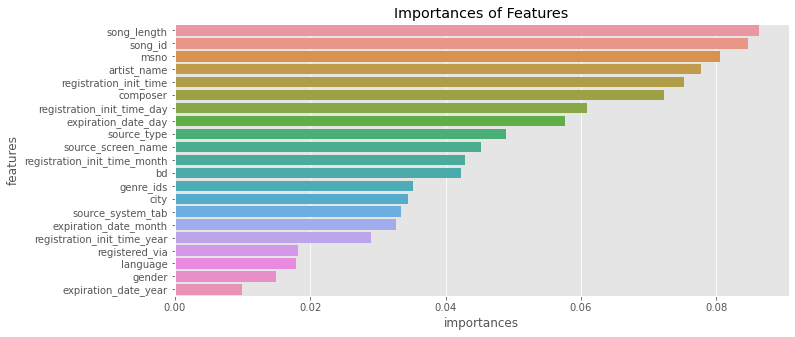

In [33]:
train_plot = pd.DataFrame({'features': train.columns[train.columns != 'target'],
                        'importances': clf.feature_importances_})
train_plot = train_plot.sort_values('importances', ascending=False)

plt.figure(figsize=[11,5])
sns.barplot(x = train_plot.importances, y = train_plot.features)
plt.title('Importances of Features')
plt.show()

In [34]:
train2=train.copy()

# Drop columns with importances < 0.04

In [35]:
train2 = train2.drop(train_plot.features[train_plot.importances < 0.04].tolist(), 1)

# Selected columns
train2.columns

Index(['msno', 'song_id', 'source_screen_name', 'source_type', 'target',
       'song_length', 'artist_name', 'composer', 'bd',
       'registration_init_time', 'registration_init_time_month',
       'registration_init_time_day', 'expiration_date_day'],
      dtype='object')

# Train & Test split

In [36]:
train3=train.copy()

X_train1=train3.drop(['target'],axis=1).values
Y_train1=train3['target'].values

x_train,x_test,y_train,y_test=train_test_split(X_train1,Y_train1,test_size=0.25)

# Creating Model

In [42]:
!pip install xgboost
import xgboost as xgb
model2 = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model2.fit(X_train1, Y_train1)

[12:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
# Predicting
Prediction = model2.predict(x_test)

In [44]:
from sklearn import metrics

print(metrics.classification_report(y_test, Prediction))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      9140
           1       0.96      0.99      0.97      9304

    accuracy                           0.97     18444
   macro avg       0.97      0.97      0.97     18444
weighted avg       0.97      0.97      0.97     18444



# CONCLUSION

0.97% Accuracy recorded, It is highest using XGBoost